# IPP 2-3
started on 26/07/2019 for 2nd year report

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.lines as mlines
import matplotlib as mpl

import itertools
from itertools import chain
import pandas as pd

import numpy as np
#import dill

import JM_general_functions as jmf
import JM_custom_figs as jmfig
from JEM_functions import medfilereader

In [2]:
green = mpl.colors.to_rgb('xkcd:kelly green')
light_green = mpl.colors.to_rgb('xkcd:light green')
almost_black = mpl.colors.to_rgb('#262626')

col={}
col['np_cas'] = 'xkcd:silver'
col['np_malt'] = 'white'
col['lp_cas'] = green
col['lp_malt'] = light_green

In [2]:
# licks Test 1

metafile="R:\\DA_and_Reward\\gc214\\IPP2\\metafileIPP2_3.txt"
medfolder="R:\\DA_and_Reward\\gc214\\IPP2\\MED-PC datafile\\"


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)



sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(4, 4))

fig.set_size_inches((4.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('  Cas.    Malt.', '       Cas.    Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:orangered',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:lightsalmon',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 6500])
ax.set_yticks([0, 2000, 4000, 6000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'], loc=(0.02, 0.55),  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3 test1_licks_NEB19.pdf', dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'R:\\DA_and_Reward\\gc214\\IPP2\\metafileIPP2_3.txt'

C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:134: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:137: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


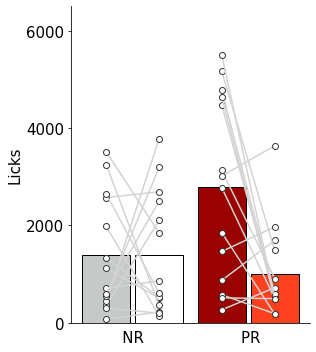

In [7]:
# licks Test 1 - version 2

metafile="R:\\DA_and_Reward\\gc214\\IPP2\\metafileIPP2_3.txt"
medfolder="R:\\DA_and_Reward\\gc214\\IPP2\\MED-PC datafile\\"


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[4]]
        bottleL = bottleL + [list[6]]
        bottleR = bottleR + [list[7]]
        licksL = licksL + [list[8]]
        licksR = licksR + [list[9]]
        TotalLicks = TotalLicks + [list[10]]
        IntakeL = IntakeL + [list[11]]
        IntakeR = IntakeR + [list[12]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)



sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(4, 4))

fig.set_size_inches((4.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('   NR', '        PR'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:deep red',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:orange red',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 6500])
ax.set_yticks([0, 2000, 4000, 6000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'], loc=(0.02, 0.55),  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3 test1_licks_NEB19(2).pdf', dpi=300)
plt.show()

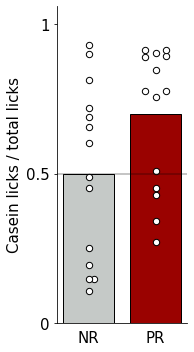

In [6]:
# Casein Preference Test 1

N=1
mNR = (0.5)
mPR = (0.7)
sNR = (0.656092555, 0.488791793, 0.688574939, 0.148148148, 0.450381679, 0.931294118, 0.14650974, 0.106493506, 0.717976319, 0.81238504, 0.192320103, 0.603206413, 0.901275652, 0.25)
sPR = (0.756225426, 0.77647589, 0.913664287, 0.847421422, 0.893170927, 0.775, 0.340226297, 0.269969666, 0.889364872, 0.904622586, 0.912850812, 0.426534769, 0.508424182, 0.453247144)

sc0 = (0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
sc36 = (0.13, 0.15, 0.11, 0.13, 0.15, 0.11, 0.13, 0.13, 0.11, 0.13, 0.15, 0.13, 0.13, 0.13)

ind = np.arange(N)   
width = 0.1   

fig, ax = plt.subplots(figsize=(2.8, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Casein licks / total licks', fontsize=15)

ax.set_xticks([ind, ind+width+0.03])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.03, mPR, width, color='xkcd:deep red', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_ylim([0, 1.06])
plt.tick_params(labelsize=15)
plt.axhline(0.5, color='black', alpha=0.3)
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Casein preference', fontsize=15)

plt.tight_layout()
plt.savefig('CasPref_IPP2-3_Test1_NEB19.pdf', format='pdf', dpi=300)
plt.show()

# Casein preference over tests

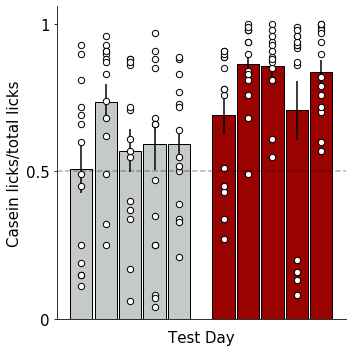

In [4]:
NR_test1 = [0.66, 0.49, 0.69, 0.15, 0.45, 0.93, 0.15, 0.11, 0.72, 0.81, 0.19, 0.60, 0.90, 0.25]
NR_test2 = [0.49, 0.93, 0.83, 0.68, 0.91, 0.96, 0.25, 0.90, 0.74, 0.62, 0.91, 0.88, 0.87, 0.32]
NR_test3 = [0.37, 0.71, 0.55, 0.40, 0.88, 0.72, 0.06, 0.86, 0.88, 0.17, 0.87, 0.34, 0.61, 0.57]
NR_test4 = [0.08, 0.91, 0.07, 0.85, 0.25, 0.35, 0.04, 0.88, 0.47, 0.68, 0.66, 0.25, 0.97, 0.66]
NR_test5 = [0.34, 0.50, 0.73, 0.33, 0.88, 0.83, 0.21, 0.39, 0.52, 0.89, 0.77, 0.64, 0.55, 0.72]

PR_test1 = [0.76, 0.78, 0.91, 0.85, 0.89, 0.78, 0.34, 0.27, 0.89, 0.90, 0.91, 0.43, 0.51, 0.45]
PR_test2 = [0.98, 0.98, 1.00, 0.81, 0.98, 0.84, 0.83, 0.76, 0.49, 0.90, 0.99, 0.94, 0.68, 0.94]
PR_test3 = [0.94, 0.85, 1.00, 0.55, 0.93, 0.87, 0.61, 0.89, 0.81, 0.98, 0.96, 0.88, 0.81, 0.91]
PR_test4 = [0.99, 0.92 ,0.20 ,0.93, 0.93, 0.16, 0.96, 0.86, 0.94, 0.87, 0.98, 0.96, 0.08, 0.13]
PR_test5 = [0.70, 0.99, 0.98, 1.00, 0.82, 1.00, 0.94, 0.72, 0.79, 0.57, 0.76, 0.90, 0.60, 0.97]

av_NR_test1 = [0.5067]
av_NR_test2 = [0.7349]
av_NR_test3 = [0.5704]
av_NR_test4 = [0.5935]
av_NR_test5 = [0.5935]

av_PR_test1 = [0.6905]
av_PR_test2 = [0.8656]
av_PR_test3 = [0.8563]
av_PR_test4 = [0.7079]
av_PR_test5 = [0.838]

err_NR_test1 = [0.07864]
err_NR_test2 = [0.06254]
err_NR_test3 = [0.07225]
err_NR_test4 = [0.08942]
err_NR_test5 = [0.0586]

err_PR_test1 = [0.06324]
err_PR_test2 = [0.03912]
err_PR_test3 = [0.0348]
err_PR_test4 = [0.09977]
err_PR_test5 = [0.04018]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Casein licks/total licks', fontsize=15)


bar1 = ax.bar(xvals[0], av_NR_test1,  width, color='xkcd:silver',  
            align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test1)
bar2 = ax.bar(xvals[1], av_NR_test2,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test2)
bar3 = ax.bar(xvals[2], av_NR_test3,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test3)
bar4 = ax.bar(xvals[3], av_NR_test4, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test4)
bar5 = ax.bar(xvals[4], av_NR_test5, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test5)

bar6 = ax.bar(xvals[5], av_PR_test1,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test1)
bar7 = ax.bar(xvals[6], av_PR_test2,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test2)
bar8 = ax.bar(xvals[7], av_PR_test3, width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test3)
bar9 = ax.bar(xvals[8], av_PR_test4,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test4)
bar10 = ax.bar(xvals[9], av_PR_test5,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test5)

sc0 = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
sc1 = [1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05, 1.05]
sc2 = [1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6]
sc3 = [2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15, 2.15,2.15]
sc4 = [2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7]
sc5 = [3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7, 3.7]
sc6 = [4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25, 4.25]
sc7 = [4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8, 4.8]
sc8 = [5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35, 5.35]
sc9 = [5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9, 5.9]

ax.scatter(sc0, NR_test1, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc1, NR_test2, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc2, NR_test3, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc3, NR_test4, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc4, NR_test5, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc5, PR_test1, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc6, PR_test2, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc7, PR_test3, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc8, PR_test4, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc9, PR_test5, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)


ax.set_ylim([0, 1.06])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_xticklabels([])
plt.axhline(0.5, color='black', alpha=0.3, linestyle='dashed')
plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
ax.set_xlabel('Test Day', fontsize=15)
#plt.legend((bar1, bar6), ("NR", "PR"), loc='upper left')
#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_cas pref_5tests_NEB19.pdf', dpi=300)
plt.show()

# casein preference over tests (2)

C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


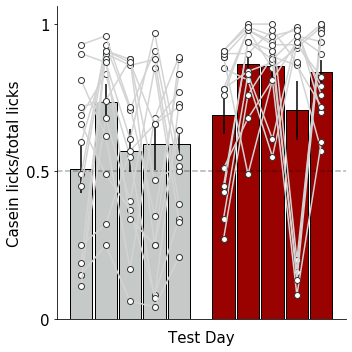

In [5]:
NR_test1 = [0.66, 0.49, 0.69, 0.15, 0.45, 0.93, 0.15, 0.11, 0.72, 0.81, 0.19, 0.60, 0.90, 0.25]
NR_test2 = [0.49, 0.93, 0.83, 0.68, 0.91, 0.96, 0.25, 0.90, 0.74, 0.62, 0.91, 0.88, 0.87, 0.32]
NR_test3 = [0.37, 0.71, 0.55, 0.40, 0.88, 0.72, 0.06, 0.86, 0.88, 0.17, 0.87, 0.34, 0.61, 0.57]
NR_test4 = [0.08, 0.91, 0.07, 0.85, 0.25, 0.35, 0.04, 0.88, 0.47, 0.68, 0.66, 0.25, 0.97, 0.66]
NR_test5 = [0.34, 0.50, 0.73, 0.33, 0.88, 0.83, 0.21, 0.39, 0.52, 0.89, 0.77, 0.64, 0.55, 0.72]

PR_test1 = [0.76, 0.78, 0.91, 0.85, 0.89, 0.78, 0.34, 0.27, 0.89, 0.90, 0.91, 0.43, 0.51, 0.45]
PR_test2 = [0.98, 0.98, 1.00, 0.81, 0.98, 0.84, 0.83, 0.76, 0.49, 0.90, 0.99, 0.94, 0.68, 0.94]
PR_test3 = [0.94, 0.85, 1.00, 0.55, 0.93, 0.87, 0.61, 0.89, 0.81, 0.98, 0.96, 0.88, 0.81, 0.91]
PR_test4 = [0.99, 0.92 ,0.20 ,0.93, 0.93, 0.16, 0.96, 0.86, 0.94, 0.87, 0.98, 0.96, 0.08, 0.13]
PR_test5 = [0.70, 0.99, 0.98, 1.00, 0.82, 1.00, 0.94, 0.72, 0.79, 0.57, 0.76, 0.90, 0.60, 0.97]

av_NR_test1 = [0.5067]
av_NR_test2 = [0.7349]
av_NR_test3 = [0.5704]
av_NR_test4 = [0.5935]
av_NR_test5 = [0.5935]

av_PR_test1 = [0.6905]
av_PR_test2 = [0.8656]
av_PR_test3 = [0.8563]
av_PR_test4 = [0.7079]
av_PR_test5 = [0.838]

err_NR_test1 = [0.07864]
err_NR_test2 = [0.06254]
err_NR_test3 = [0.07225]
err_NR_test4 = [0.08942]
err_NR_test5 = [0.0586]

err_PR_test1 = [0.06324]
err_PR_test2 = [0.03912]
err_PR_test3 = [0.0348]
err_PR_test4 = [0.09977]
err_PR_test5 = [0.04018]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Casein licks/total licks', fontsize=15)


bar1 = ax.bar(xvals[0], av_NR_test1,  width, color='xkcd:silver',  
            align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test1)
bar2 = ax.bar(xvals[1], av_NR_test2,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test2)
bar3 = ax.bar(xvals[2], av_NR_test3,  width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test3)
bar4 = ax.bar(xvals[3], av_NR_test4, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test4)
bar5 = ax.bar(xvals[4], av_NR_test5, width, color='xkcd:silver',
           align='center', label='Non-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_NR_test5)

bar6 = ax.bar(xvals[5], av_PR_test1,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test1)
bar7 = ax.bar(xvals[6], av_PR_test2,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test2)
bar8 = ax.bar(xvals[7], av_PR_test3, width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test3)
bar9 = ax.bar(xvals[8], av_PR_test4,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test4)
bar10 = ax.bar(xvals[9], av_PR_test5,  width, color='xkcd:deep red',
           align='center', label='Protein-restricted', edgecolor='black', alpha=1, zorder=-1, yerr=err_PR_test5)

for y1,y2,y3,y4,y5 in zip(NR_test1, NR_test2, NR_test3, NR_test4, NR_test5):
    ax.plot([xvals[0], xvals[1], xvals[2], xvals[3], xvals[4]],[y1,y2, y3, y4, y5], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2,y3,y4,y5 in zip(PR_test1, PR_test2, PR_test3, PR_test4, PR_test5):
    ax.plot([xvals[5], xvals[6], xvals[7], xvals[8], xvals[9]],[y1,y2, y3, y4, y5],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)     


ax.set_ylim([0, 1.06])
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_xticklabels([])
plt.axhline(0.5, color='black', alpha=0.3, linestyle='dashed')
plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
ax.set_xlabel('Test Day', fontsize=15)
#plt.legend((bar1, bar6), ("NR", "PR"), loc='upper left')
#plt.title('Preference Test', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_cas pref_5tests_NEB19(2).pdf', dpi=300)
plt.show()

# food intake - IPP2/3

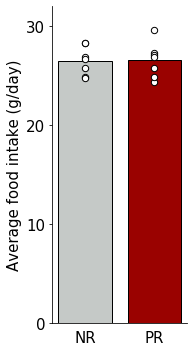

In [15]:
N=1
sNR = (24.87, 28.26, 26.92, 28.29, 26.66, 25.81, 24.75)
sPR = (27.24, 24.39, 27.11, 29.61, 25.81, 26.84, 24.84)
mNR = (26.51)
mPR = (26.55)

sc0 = (0, 0, 0, 0, 0, 0, 0)
sc36 = (0.13, 0.13, 0.13, 0.13, 0.13, 0.13, 0.13)

ind = np.arange(N)   
width = 0.1   

fig, ax = plt.subplots(figsize=(2.8, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Average food intake (g/day)', fontsize=15)

ax.set_xticks([ind, ind+width+0.03])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.03, mPR, width, color='xkcd:deep red', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(('0', '10', '20', '30'), fontsize=15)
ax.set_ylim([0, 32])
plt.tick_params(labelsize=15)
#plt.axhline(0.5, color='black', alpha=0.3)
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Food intake', fontsize=15)

plt.tight_layout()
plt.savefig('IPP2-3_food intake.png', format='png', dpi=800)
plt.show()

# body weight - IPP2/3

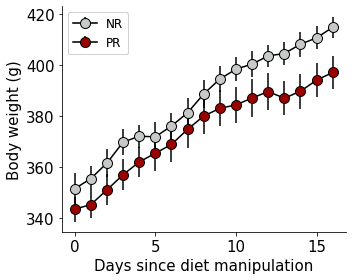

In [16]:
NR_av = [351.50, 355.50, 361.57, 369.79, 372.07, 371.86, 376.07, 381.29, 388.64, 394.50, 398.36, 400.36, 403.57, 404.50, 408.14, 410.64, 414.79]
PR_av = [343.50, 345.29, 351.07, 357.00, 362.00, 365.43, 368.86, 374.79, 380.00, 383.00, 384.36, 387.07, 389.57, 387.00, 389.71, 394.07, 397.07]
NR_sem = [6.14, 5.00, 5.35, 5.09, 4.57, 5.80, 5.25, 5.61, 5.62, 5.19, 4.69, 5.15, 4.45, 4.37, 4.84, 4.50, 4.16]
PR_sem = [4.86, 5.33, 6.04, 6.06, 6.05, 6.80, 6.82, 7.18, 7.01, 7.03, 6.93, 7.31, 7.36, 6.74, 6.87, 6.73, 6.56]

fig1a=plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16)

p1=plt.errorbar(x1, NR_av, yerr=NR_sem, color='black',  marker='o', markerfacecolor='xkcd:silver', markersize=10)
p2=plt.errorbar(x1, PR_av, yerr=PR_sem, color='black',  marker='o',  markerfacecolor='xkcd:deep red', markersize=10)

ax.set_ylabel("Body weight (g)", fontsize=15)
ax.set_xlabel("Days since diet manipulation", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)
leg1 = ax.legend([p1, p2],['NR', 'PR'], loc='upper left', fontsize=12)
#leg2 = ax.legend([p4, p3], ['NR', 'PR'], loc='lower right', fontsize=12)
ax.add_artist(leg1)

plt.tight_layout()
plt.savefig('Bodyweight.png', dpi=300)
plt.show()


# food intake - line plot

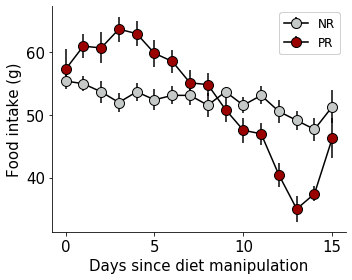

In [2]:
NR_av = [55.43, 55.00, 53.71, 52.00, 53.71, 52.43, 53.14, 53.14, 51.57, 53.71, 51.57, 53.14, 50.57, 49.14, 47.71, 51.33]
PR_av = [57.29, 61.00, 60.71, 63.71, 63.00, 59.86, 58.57, 55.14, 54.86, 50.86, 47.57, 47.00, 40.43, 35.00, 37.43, 46.29]
NR_sem = [1.00, 1.20, 1.71, 1.51, 1.48, 1.65, 1.44, 1.50, 1.89, 0.64, 1.27, 1.44, 1.85, 1.53, 1.80, 2.60]
PR_sem = [3.20, 1.93, 2.47, 2.00, 2.00, 2.15, 1.85, 2.12, 1.87, 1.94, 1.99, 1.79, 1.86, 2.01, 1.17, 3.22]

fig1a=plt.figure(figsize=(5, 4))
ax = plt.subplot(1, 1, 1)

x1 = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)

p1=plt.errorbar(x1, NR_av, yerr=NR_sem, color='black',  marker='o', markerfacecolor='xkcd:silver', markersize=10)
p2=plt.errorbar(x1, PR_av, yerr=PR_sem, color='black',  marker='o',  markerfacecolor='xkcd:deep red', markersize=10)

ax.set_ylabel("Food intake (g)", fontsize=15)
ax.set_xlabel("Days since diet manipulation", fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
plt.tick_params(labelsize=15)
leg1 = ax.legend([p1, p2],['NR', 'PR'], loc='upper right', fontsize=12)
#leg2 = ax.legend([p4, p3], ['NR', 'PR'], loc='lower right', fontsize=12)
ax.add_artist(leg1)

plt.tight_layout()
plt.savefig('Food intake_line.png', dpi=300)
plt.show()

# Palatability - Licks per cluster in NR over preference tests

C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


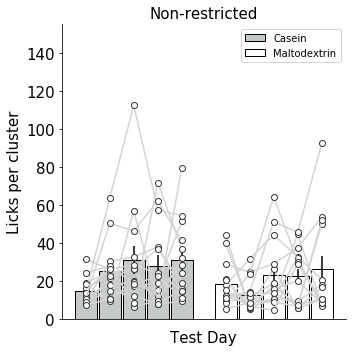

In [51]:
av_test1_cas = [14.81]
av_test2_cas = [25.37]
av_test3_cas = [30.78]
av_test4_cas = [28.01]
av_test5_cas = [30.86]

test1_cas = [19.11, 14.46, 14.75, 8.55, 11.8, 8.08, 16.41, 13.64, 18.27, 24.31, 10.64, 8.6, 31.25, 7.4]
test2_cas = [24.41, 10.76, 26.26, 30.24, 17.77, 21.48, 22.38, 63.45, 9.55, 27.61, 50.19, 14.65, 26.23, 10.25]
test3_cas = [26.02, 17.49, 19.7, 32.56, 19.35, 26.36, 6.21, 112.39, 56.96, 8.49, 46.42, 12.26, 28.41, 18.32]
test4_cas = [7.59, 18.65, 12.19, 37.93, 14.92, 36.86, 9.61, 57.33, 9.63, 71.63, 61.95, 7.74, 23.86, 22.28]
test5_cas = [15.58, 51.38, 24.15, 14.67, 28.37, 19.1, 31.83, 54.37, 79.5, 36.67, 41.35, 9.33, 14.58, 11.21]

err_test1_cas = [1.81]
err_test2_cas = [4.05]
err_test3_cas = [7.29]
err_test4_cas = [5.82]
err_test5_cas = [5.39]

av_test1_mal = [18.32]
av_test2_mal = [12.54]
av_test3_mal = [23.2]
av_test4_mal = [22.31]
av_test5_mal = [25.99]

test1_mal = [17.55, 20.86, 14.91, 20.63, 11.84, 12.17, 28.81, 44, 9.53, 8.27, 39.73, 5.21, 11.87, 11.1]
test2_mal = [31.53, 5.36, 6.19, 6.74, 7.92, 14, 24.59, 5.88, 9.9, 23.73, 6.34, 8.5, 11.33, 13.56]
test3_mal = [44.21, 17.61, 10, 26.18, 10.62, 51, 28.95, 10.59, 8.8, 64.14, 4.66, 15.82, 18.76, 13.46]
test4_mal = [32.56, 6.87, 44.51, 5.49, 32.17, 45.48, 37.28, 9.16, 6.59, 30.15, 29.05, 20.01, 5.75, 7.23]
test5_mal = [20.68, 49.98, 7.17, 10.29, 6.88, 92.36, 53.84, 18.01, 51.97, 9.17, 8.25, 8.24, 16.48, 10.59]

err_test1_mal = [3.12]
err_test2_mal = [2.21]
err_test3_mal = [4.79]
err_test4_mal = [4.07]
err_test5_mal = [6.93]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks per cluster', fontsize=15)

#ax.set_xticklabels(('  Cas. Malt.', '   Cas. Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_cas,  width, color='xkcd:silver',  
            align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_cas)
bar2 = ax.bar(xvals[1], av_test2_cas,  width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_cas)
bar3 = ax.bar(xvals[2], av_test3_cas,  width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_cas)
bar4 = ax.bar(xvals[3], av_test4_cas, width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_cas)
bar5 = ax.bar(xvals[4], av_test5_cas, width, color='xkcd:silver',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_cas)

bar6 = ax.bar(xvals[5], av_test1_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_mal)
bar7 = ax.bar(xvals[6], av_test2_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_mal)
bar8 = ax.bar(xvals[7], av_test3_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_mal)
bar9 = ax.bar(xvals[8], av_test4_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_mal)
bar10 = ax.bar(xvals[9], av_test5_mal,  width, color='white',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_mal)

for y1,y2,y3,y4,y5 in zip(test1_cas, test2_cas, test3_cas, test4_cas, test5_cas):
    ax.plot([xvals[0], xvals[1], xvals[2], xvals[3], xvals[4]],[y1,y2, y3, y4, y5], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2,y3,y4,y5 in zip(test1_mal, test2_mal, test3_mal, test4_mal, test5_mal):
    ax.plot([xvals[5], xvals[6], xvals[7], xvals[8], xvals[9]],[y1,y2, y3, y4, y5],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)     

ax.set_ylim([0, 155])
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])
ax.set_yticklabels(('0', '20', '40', '60', '80', '100', '120', '140'), fontsize=15)
ax.set_xticklabels([])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])

plt.legend((bar1, bar6), ("Casein", "Maltodextrin"), loc='upper right')     
ax.set_xlabel('Test Day', fontsize=15)

plt.title('Non-restricted', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks per cluster_NR_5tests.png', dpi=300)
plt.show()

# Palatability - Licks per cluster in PR over preference tests

C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:74: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:77: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


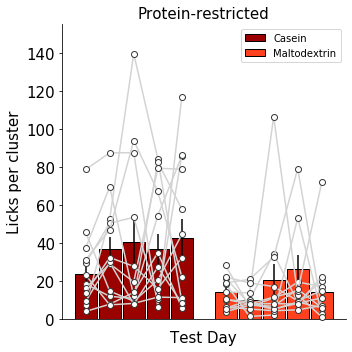

In [49]:
av_test1_cas = [23.53]
av_test2_cas = [36.84]
av_test3_cas = [40.25]
av_test4_cas = [36.56]
av_test5_cas = [42.80]

test1_cas = [7.12, 18.33, 78.61, 45.52, 37.27, 29.26, 16.15, 3.87, 23.07, 31.13, 9.22, 13.7, 3.77, 12.41]
test2_cas = [52.59, 11.83, 87.38, 14.6, 69.48, 50.36, 28.98, 7.69, 7.33, 46.88, 29.69, 32.25, 21.79, 54.87]
test3_cas = [139.61, 10.75, 87.46, 9.27, 11.92, 53.41, 19.42, 13.85, 8.11, 93.83, 7.74, 27.63]
test4_cas = [84.35, 82.59, 6.43, 20.35, 54.38, 10.37, 79.29, 34.82, 11.41, 67.03, 27.18, 15.92, 5.82, 11.91]
test5_cas = [8.76, 57.77, 116.9, 44.45, 85.73, 86.34, 78.75, 5.81, 11.16, 22.02, 8.12, 32.26, 6.21, 34.96]

err_test1_cas = [5.42]
err_test2_cas = [6.49]
err_test3_cas = [12.66]
err_test4_cas = [8.13]
err_test5_cas = [9.78]

av_test1_mal = [14.26]
av_test2_mal = [10.03]
av_test3_mal = [20.33]
av_test4_mal = [26.38]
av_test5_mal = [14.13]

test1_mal = [5.47, 28.08, 18.57, 14.29, 21.4, 18.94, 21.96, 3.8, 10.07, 6.11, 5.21, 10.21, 6.2, 29.33]
test2_mal = [10, 6.14, 1.25, 13.54, 7.78, 20.75, 18.91, 7.1, 9.06, 5.15, 8, 7.77, 17, 7.94]
test3_mal = [34.3, 11.06, 2, 106.48, 11.46, 32.5, 16.97, 6.68, 5.17, 4.27, 5.05, 8]
test4_mal = [8.67, 19.33, 53.05, 12.56, 14.52, 79.1, 9.42, 15.59, 8.12, 4.7, 8.81, 7.74, 46.23, 81.53]
test5_mal = [20.04, 17, 2.56, 1, 71.8, 5.5, 14.86, 5.84, 11.02, 6.98, 5.86, 22.22, 7.13, 6.02]

err_test1_mal = [2.35]
err_test2_mal = [1.48]
err_test3_mal = [8.41]
err_test4_mal = [7.22]
err_test5_mal = [4.76]

width = 0.5    
xvals = [0.5, 1.05, 1.6, 2.15, 2.7, 3.7, 4.25, 4.8, 5.35, 5.9]

fig, ax = plt.subplots()
fig.set_size_inches((5, 5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks per cluster', fontsize=15)


bar1 = ax.bar(xvals[0], av_test1_cas,  width, color='xkcd:deep red',  
            align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_cas)
bar2 = ax.bar(xvals[1], av_test2_cas,  width, color='xkcd:deep red',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_cas)
bar3 = ax.bar(xvals[2], av_test3_cas,  width, color='xkcd:deep red',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_cas)
bar4 = ax.bar(xvals[3], av_test4_cas, width, color='xkcd:deep red',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_cas)
bar5 = ax.bar(xvals[4], av_test5_cas, width, color='xkcd:deep red',
           align='center', label='Casein', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_cas)

bar6 = ax.bar(xvals[5], av_test1_mal,  width, color='xkcd:orange red',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test1_mal)
bar7 = ax.bar(xvals[6], av_test2_mal,  width, color='xkcd:orange red',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test2_mal)
bar8 = ax.bar(xvals[7], av_test3_mal,  width, color='xkcd:orange red',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test3_mal)
bar9 = ax.bar(xvals[8], av_test4_mal,  width, color='xkcd:orange red',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test4_mal)
bar10 = ax.bar(xvals[9], av_test5_mal,  width, color='xkcd:orange red',
           align='center', label='Maltodextrin', edgecolor='black', alpha=1, zorder=-1, yerr=err_test5_mal)

for y1,y2,y3,y4,y5 in zip(test1_cas, test2_cas, test3_cas, test4_cas, test5_cas):
    ax.plot([xvals[0], xvals[1], xvals[2], xvals[3], xvals[4]],[y1,y2, y3, y4, y5], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2,y3,y4,y5 in zip(test1_mal, test2_mal, test3_mal, test4_mal, test5_mal):
    ax.plot([xvals[5], xvals[6], xvals[7], xvals[8], xvals[9]],[y1,y2, y3, y4, y5],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)     

ax.set_ylim([0, 155])
ax.set_yticks([0, 20, 40, 60, 80, 100, 120, 140])
ax.set_yticklabels(('0', '20', '40', '60', '80', '100', '120', '140'), fontsize=15)
ax.set_xticklabels([])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
ax.set_xticks([1.5, 3])
plt.legend((bar1, bar6), ("Casein", "Maltodextrin"), loc='upper right')     
ax.set_xlabel('Test Day', fontsize=15)
     

plt.title('Protein-restricted', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks per cluster_PR_5tests.png', dpi=300)
plt.show()

# licks per cluster test 1

C:\Users\gc214.UOL\AppData\Local\Continuum\anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
C:\Users\gc214.UOL\AppData\Local\Continuum\anaconda3\ANACONDA\lib\site-packages\ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


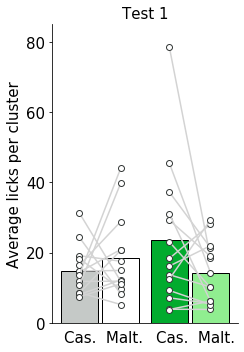

In [41]:
NR_cas = [19.11, 14.46, 14.75, 8.55, 11.8, 8.08, 16.41, 13.64, 18.27, 24.31, 10.64, 8.6, 31.25, 7.4]
NR_mal = [17.55, 20.86, 14.91, 20.63, 11.84, 12.17, 28.81, 44, 9.53, 8.27, 39.73, 5.21, 11.87, 11.1]
PR_cas = [7.12, 18.33, 78.61, 45.52, 37.27, 29.26, 16.15, 3.87, 23.07, 31.13, 9.22, 13.7, 3.77, 12.41]
PR_mal = [5.47, 28.08, 18.57, 14.29, 21.4, 18.94, 21.96, 3.8, 10.07, 6.11, 5.21, 10.21, 6.2, 29.33]

NR_cas_av = (14.81)
NR_mal_av = (18.32)
PR_cas_av = (23.53)
PR_mal_av = (14.26)

sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Average licks per cluster', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('    Cas.  Malt.', '        Cas.  Malt.'), fontsize=10)
ax.set_ylim(0, 80)

bar1 = ax.bar(xvals[0], NR_cas_av, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], NR_mal_av, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], PR_cas_av, width, color='xkcd:kelly green',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], PR_mal_av, width, color='lightgreen',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

plt.yticks([0, 20, 40, 60, 80], ["0", "20", "40", "60", "80"], fontsize=15)
plt.tick_params(labelsize=15)

for y1,y2 in zip(NR_cas, NR_mal):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(PR_cas, PR_mal):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

    plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 

ax.set_ylim([0, 85])

plt.title('Test 1', fontsize=15)
plt.tight_layout()
plt.savefig('IPP2-3_licks_x_clusters_test1.pdf', dpi=800)
plt.show()

In [ ]:
def dividelicks(licks, time):
    before = [x for x in licks if x < time]
    after = [x for x in licks if x > time]
    
    return before, after



for i in rats:
    for j in ['s10']:
        
        x = rats[i].sessions[j]

        x.left['licks-forced'], x.left['licks-free'] = dividelicks(x.left['licks'], x.both['sipper'][0])
        x.right['licks-forced'], x.right['licks-free'] = dividelicks(x.right['licks'], x.both['sipper'][0])

df = pd.DataFrame([x for x in rats])

# IPPneo - Licks

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2448: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


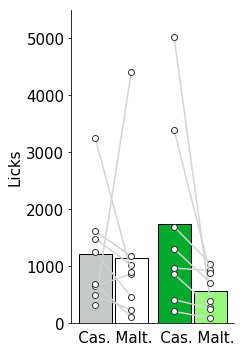

In [7]:
metafile="R:\\DA_and_Reward\\gc214\\IPPneo\\IPPneo_metafile.txt"
medfolder="R:\\DA_and_Reward\\gc214\\IPPneo\\MED-PC datafile\\"


def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[3]]
        bottleL = bottleL + [list[4]]
        bottleR = bottleR + [list[5]]
        licksL = licksL + [list[6]]
        licksR = licksR + [list[7]]
        TotalLicks = TotalLicks + [list[8]]
        IntakeL = IntakeL + [list[9]]
        IntakeR = IntakeR + [list[10]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
LLicks = []
for l in Licks:
    LLicks.append(len(l[0]))
RLicks = []
for l in Licks:
    RLicks.append(len(l[1]))

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks[index])
                        

av_test1_C_NR = np.mean(test1_C_NR)
av_test1_M_NR = np.mean(test1_M_NR)
av_test1_C_PR = np.mean(test1_C_PR)
av_test1_M_PR = np.mean(test1_M_PR)



sc0 = (0, 0, 0, 0)
sc36 = (0.36, 0.36, 0.36, 0.36)
sc1 = (0.78, 0.78, 0.78, 0.78)
sc136 = (1.13, 1.13, 1.13, 1.13)



width = 0.5    
xvals = [0.5, 1.05, 1.70, 2.25]

fig, ax = plt.subplots(figsize=(3, 4))

fig.set_size_inches((3.5, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.set_ylabel('Licks', fontsize=15)
ax.set_xticks([0.7, 1.8])
ax.set_xticklabels(('   Cas. Malt.', '       Cas. Malt.'), fontsize=10)


bar1 = ax.bar(xvals[0], av_test1_C_NR, width, color='xkcd:silver',  
            align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar2 = ax.bar(xvals[1], av_test1_M_NR, width, color='white',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)
bar3 = ax.bar(xvals[2], av_test1_C_PR, width, color='xkcd:kelly green',
           align='center', label='casein', edgecolor='black', alpha=1, zorder=-1)
bar4 = ax.bar(xvals[3], av_test1_M_PR, width, color='xkcd:light green',
           align='center', label='malto', edgecolor='black', alpha=1, zorder=-1)

ax.set_ylim([0, 5500])
ax.set_yticks([0, 1000, 2000, 3000, 4000, 5000])

plt.tick_params(labelsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False) 
       

for y1,y2 in zip(test1_C_NR, test1_M_NR):
    ax.plot([xvals[0], xvals[1]],[y1,y2], c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)
    
for y1,y2 in zip(test1_C_PR, test1_M_PR):
    ax.plot([xvals[2], xvals[3]],[y1,y2],c='xkcd:charcoal', marker='o',markerfacecolor='w', color= 'lightgrey', markeredgecolor='xkcd:charcoal', markersize=6, zorder=20, alpha=1, clip_on=False)

#leg1 = ax.legend([bar1,bar2, bar3, bar4],['Cas.','Malto.', 'Cas.','Malto.'], loc=(0.02, 0.55),  fontsize=9)
#   leg1 = ax.legend([bar1,bar2],['Casein','Maltodextrin'], loc='upper left', fontsize=6)
  #leg2 = ax.legend([bar3,bar4],['Casein','Maltodextrin'], loc='upper right', fontsize=6)
  #ax.add_artist(leg1)

#plt.title('Test 1', fontsize=15)
plt.tight_layout()
#plt.savefig('IPPneo_test1_licks.pdf', dpi=800)
plt.show()

In [11]:
test1_C_PR

[5021, 859, 1689, 961, 407, 1304, 3392, 201]

# cumulative licks IPPneo

In [4]:
# cumulative licks IPPneo test 1

metafile="R:\\DA_and_Reward\\gc214\\IPPneo\\IPPneo_metafile.txt"
medfolder="R:\\DA_and_Reward\\gc214\\IPPneo\\MED-PC datafile\\"

def DataExtract (metafile):
    f = open(metafile, 'r')
    f.seek(0)
    Rows = f.readlines()[1:]
    
    tablerows = []
    for i in Rows:
        tablerows.append(i.split('\t'))
        
        Medfile, Rat, Session, Diet, bottleL, bottleR, licksL, licksR, \
        TotalLicks, IntakeL, IntakeR = [], [], [], [], [], [], [], [], [], [], []
        
    for i, list in enumerate(tablerows):
        Medfile = Medfile + [list[0]]
        Rat = Rat + [list[1]]
        Session = Session + [list[2]]
        Diet = Diet + [list[3]]
        bottleL = bottleL + [list[4]]
        bottleR = bottleR + [list[5]]
        licksL = licksL + [list[6]]
        licksR = licksR + [list[7]]
        TotalLicks = TotalLicks + [list[8]]
        IntakeL = IntakeL + [list[9]]
        IntakeR = IntakeR + [list[10]]
            
    return ({'Medfile':Medfile, 'Rat':Rat, 'Session':Session, \
             'Diet':Diet, 'bottleL':bottleL, 'bottleR':bottleR, 'licksL':licksL, \
             'licksR':licksR, 'TotalLicks':TotalLicks, 'IntakeL':IntakeL, \
             'IntakeR':IntakeR})
    
Data = DataExtract(metafile)

Licks = []
for Medfile in Data['Medfile']:
    Licks.append(medfilereader(medfolder+Medfile,varsToExtract = ['b','e'], remove_var_header = True))

#when it's conditioning, you just have the list TotalLicks
#LLicks = []
#for l in Licks:
#    LLicks.append(len(l[0]))
#RLicks = []
#for l in Licks:
#    RLicks.append(len(l[1]))

LLicks2 = []
for l in Licks:
    LLicks2.append(l[0])
RLicks2 = []
for l in Licks:
    RLicks2.append(l[1])

#lists of licks 
    
test1_C_NR = []
test1_M_NR = []
test1_C_PR = []
test1_M_PR = []

data  = pd.read_csv(metafile)


for rat in np.unique(Data['Rat']): #create a list of the rats in numerical order
    for index, session in enumerate(Data['Session']): #index the position in the Session list
        if session == 's4' :
            if Data['Rat'][index] == rat:
                if 'NR' in Data['Diet'][index]:
                    if 'cas' in Data ['bottleL'][index]:
                        test1_C_NR.append(LLicks2[index])
                    if 'cas' in Data ['bottleR'][index]:
                        test1_C_NR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_NR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_NR.append(RLicks2[index])
                if 'PR' in Data['Diet'][index]:
                    if 'cas' in Data['bottleL'][index]:
                        test1_C_PR.append(LLicks2[index])
                    if 'cas' in Data['bottleR'][index]:
                        test1_C_PR.append(RLicks2[index])
                    if 'malto' in Data['bottleL'][index]:
                        test1_M_PR.append(LLicks2[index])
                    if 'malto' in Data ['bottleR'][index]:
                        test1_M_PR.append(RLicks2[index])

In [5]:

test1_C_NR_cumsum = []                     
for licklist in test1_C_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_NR_cumsum.append(cumTemp)

test1_M_NR_cumsum = []
for licklist in test1_M_NR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_NR_cumsum.append(cumTemp)
    
test1_C_PR_cumsum = []
for licklist in test1_C_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_C_PR_cumsum.append(cumTemp)
    
test1_M_PR_cumsum = []
for licklist in test1_M_PR:
    histTemp= np.histogram (licklist, bins=60, range=(0, 3600))[0]
    cumTemp = np.cumsum(histTemp)
    test1_M_PR_cumsum.append(cumTemp)
    
#df_test1_M_PR = pd.DataFrame(test1_M_PR)
#df_test1_C_PR = pd.DataFrame(test1_C_PR)
#df_test1_C_NR = pd.DataFrame(test1_C_NR)
#df_test1_M_NR = pd.DataFrame(test1_M_NR)
mean_test1_C_NR= np.mean(test1_C_NR_cumsum, axis=0)
mean_test1_M_NR = np.mean(test1_M_NR_cumsum, axis=0)
mean_test1_C_PR = np.mean(test1_C_PR_cumsum, axis=0)
mean_test1_M_PR = np.mean(test1_M_PR_cumsum, axis=0)
#mean_test1_M_NR = df_test1_M_NR.mean(axis=0)
#mean_test1_C_PR = df_test1_C_PR.mean(axis=0)
#mean_test1_M_PR = df_test1_M_PR.mean(axis=0)


nRats = len(test1_C_NR_cumsum)
sem_test1_C_NR= np.std(test1_C_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_NR = np.std(test1_M_NR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_C_PR = np.std(test1_C_PR_cumsum, axis=0)/np.sqrt(nRats)
sem_test1_M_PR = np.std(test1_M_PR_cumsum, axis=0)/np.sqrt(nRats)


In [9]:
test1_M_NR_cumsum

[array([  90,  155,  155,  277,  356,  356,  356,  356,  356,  356,  356,
         356,  378,  378,  378,  378,  378,  378,  378,  380,  391,  391,
         391,  391,  391,  391,  391,  391,  391,  391,  391,  391,  391,
         391,  391,  391,  391,  391,  391,  391,  391,  391,  391,  391,
         391,  391,  391,  391,  391,  391,  396,  396,  396,  529,  660,
         662,  758,  858,  862, 1009], dtype=int64),
 array([  6,   6, 192, 203, 222, 346, 346, 347, 347, 355, 355, 361, 361,
        361, 361, 361, 361, 361, 361, 361, 361, 361, 364, 365, 365, 366,
        367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367, 367,
        371, 371, 581, 802, 825, 858, 858, 858, 858, 858, 858, 858, 858,
        858, 858, 858, 858, 858, 858, 858, 858], dtype=int64),
 array([  82,  132,  156,  169,  514,  770,  907, 1057, 1110, 1359, 1364,
        1498, 1785, 1816, 1816, 1819, 1819, 1819, 1821, 1822, 1822, 1822,
        1822, 1822, 1837, 2187, 2191, 2195, 2558, 2668, 2691, 2915, 2925,


Text(62, 567.125, 'Maltodextrin')

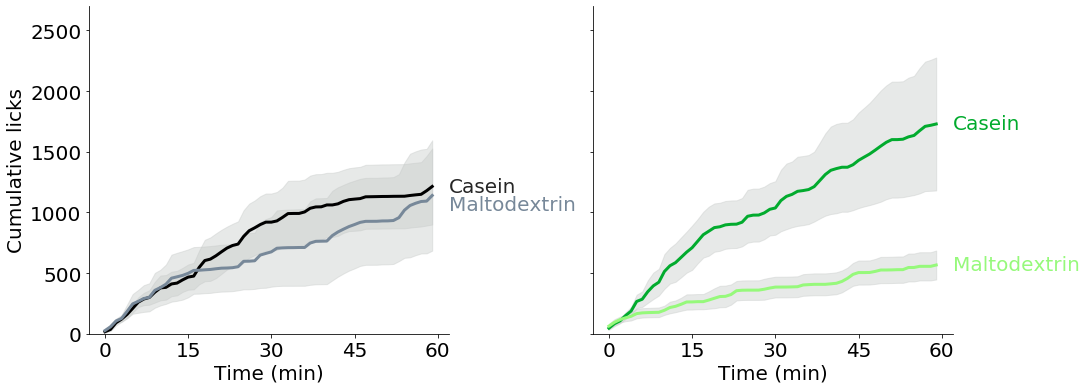

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex = True, sharey=True)
fig.subplots_adjust(top=0.85, bottom=0.2, left=0.15, right=0.95, wspace=0.4)

axs[0].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[1].spines["top"].set_visible(False)

linewidth=3
hist1=axs[0].plot(mean_test1_C_NR,  color="black", label='Casein', linewidth=linewidth)
hist2= axs[0].plot(mean_test1_M_NR,   color='lightslategray',  label='Maltodextrin', linewidth=linewidth)
hist3= axs[1].plot(mean_test1_C_PR,   color=green,  label='Casein', linewidth=linewidth)
hist4= axs[1].plot(mean_test1_M_PR,   color=light_green,  label='Maltodextrin', linewidth=linewidth)

x=np.arange(60)
y=mean_test1_C_NR
yerror=sem_test1_C_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_M_NR
yerror=sem_test1_M_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_C_PR
yerror=sem_test1_C_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_M_PR
yerror=sem_test1_M_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

#fig.text(0.5, 0.05, 'Time (min)', ha='center')

axs[0].set_ylabel('Cumulative licks', fontsize=20)
axs[0].set_xlabel('Time (min)', fontsize=20)
axs[1].set_xlabel('Time (min)', fontsize=20)

plt.xticks([0, 15, 30, 45, 60], ["0", "15", "30", "45", "60"], fontsize=15)
#axs[0].set_xlim([0,12])
axs[0].set_ylim([0, 2700])
plt.yticks([0, 500, 1000, 1500, 2000, 2500], fontsize=20)
#axs[1].tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='on', labelsize=20)
axs[0].tick_params( labelsize=20)
axs[1].tick_params( labelsize=20)

#axs[0].set_title('Non-restricted')
#axs[1].set_title('Protein-restricted')

axs[0].text(62, max(mean_test1_C_NR), 'Casein', va='center', color=almost_black, fontsize=20)
axs[0].text(62, max(mean_test1_M_NR), 'Maltodextrin', va='top', color='lightslategray', fontsize=20)
axs[1].text(62, max(mean_test1_C_PR), 'Casein', va='center', color=green, fontsize=20)
axs[1].text(62, max(mean_test1_M_PR), 'Maltodextrin', va='center', color=light_green, fontsize=20)

# axs[0].legend(loc= 'upper right', fontsize=14)
# axs[1].legend(loc='upper right', fontsize=14)

#fig.set_tight_layout(True)

#fig.savefig('Timecourse_IPPneo_day1.pdf', dpi=800, bbox_inches='tight')

# from minute 41 onwards

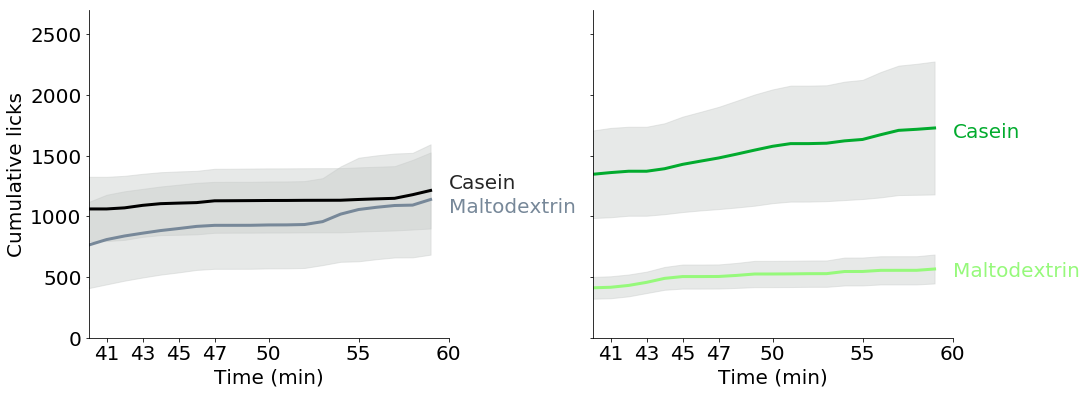

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharex = True, sharey=True)
fig.subplots_adjust(top=0.85, bottom=0.2, left=0.15, right=0.95, wspace=0.4)

axs[0].spines["right"].set_visible(False)
axs[1].spines["right"].set_visible(False)
axs[0].spines["top"].set_visible(False)
axs[1].spines["top"].set_visible(False)

linewidth=3
hist1=axs[0].plot(mean_test1_C_NR,  color="black", label='Casein', linewidth=linewidth)
hist2= axs[0].plot(mean_test1_M_NR,   color='lightslategray',  label='Maltodextrin', linewidth=linewidth)
hist3= axs[1].plot(mean_test1_C_PR,   color=green,  label='Casein', linewidth=linewidth)
hist4= axs[1].plot(mean_test1_M_PR,   color=light_green,  label='Maltodextrin', linewidth=linewidth)

x=np.arange(60)
y=mean_test1_C_NR
yerror=sem_test1_C_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_M_NR
yerror=sem_test1_M_NR
errorpatch = axs[0].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_C_PR
yerror=sem_test1_C_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

y=mean_test1_M_PR
yerror=sem_test1_M_PR
errorpatch = axs[1].fill_between(x, y-yerror, y+yerror, color='xkcd:silver', alpha=0.4)

#fig.text(0.5, 0.05, 'Time (min)', ha='center')

axs[0].set_ylabel('Cumulative licks', fontsize=20)
axs[0].set_xlabel('Time (min)', fontsize=20)
axs[1].set_xlabel('Time (min)', fontsize=20)

plt.xticks([ 41, 43, 45, 47, 50, 55, 60], [ "41", "43", "45", "47", "50", "55", "60"], fontsize=15)
axs[0].set_xlim([40,60])
axs[0].set_ylim([0,2700])
plt.yticks([0, 500, 1000, 1500, 2000, 2500], fontsize=20)
#axs[1].tick_params(top='off', bottom='on', left='on', right='off', labelleft='off', labelbottom='on', labelsize=20)
axs[0].tick_params( labelsize=20)
axs[1].tick_params( labelsize=20)


#axs[0].set_title('Non-restricted')
#axs[1].set_title('Protein-restricted')

axs[0].text(60, 1200, 'Casein', va='bottom', color=almost_black, fontsize=20)
axs[0].text(60, 1000, 'Maltodextrin', va='bottom', color='lightslategray', fontsize=20)
axs[1].text(60, 550, 'Maltodextrin', va='center', color=light_green, fontsize=20)
axs[1].text(60, 1700, 'Casein', va='center', color=green, fontsize=20)

# axs[0].legend(loc= 'upper right', fontsize=14)
# axs[1].legend(loc='upper right', fontsize=14)
#plt.tight_layout()
fig.savefig('Timecourse_IPPneo_day 1_40-60min.pdf', dpi=800, bbox_inches='tight')

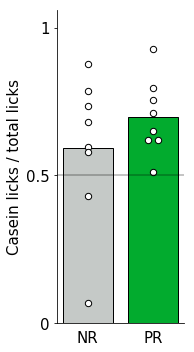

In [17]:
# Casein Preference IPPneo Test 1

N=1
mNR = (0.5931)
mPR = (0.6983)
sNR = (0.594378, 0.732784, 0.8758, 0.579231, 0.681241, 0.783627, 0.4299, 0.067456)
sPR = (0.648434, 0.796057, 0.710247, 0.928268, 0.755497, 0.618681, 0.510627, 0.618541)

sc0 = (0, 0, 0, 0, 0, 0, 0, 0)
sc36 = (0.13, 0.13, 0.13, 0.13, 0.13, 0.14, 0.13, 0.12)

ind = np.arange(N)   
width = 0.1   

fig, ax = plt.subplots(figsize=(2.8, 5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_ylabel('Casein licks / total licks', fontsize=15)

ax.set_xticks([ind, ind+width+0.03])
ax.set_xticklabels(('NR', 'PR'), fontsize=15)

bar1 = ax.bar(ind, mNR,  width, color= 'xkcd:silver',
             align='center', label='NR', edgecolor='black', alpha=1, zorder=-1)

bar2 = ax.bar(ind+width+0.03, mPR, width, color='xkcd:kelly green', 
            align='center', label='PR', edgecolor='black', alpha=1, zorder=-1)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False)        # ticks along the top edge are off
 
ax.set_yticks([0, 0.5, 1])
ax.set_yticklabels(('0', '0.5', '1'), fontsize=15)
ax.set_ylim([0, 1.06])
plt.tick_params(labelsize=15)
plt.axhline(0.5, color='black', alpha=0.3)
ax.scatter(sc0, sNR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)
ax.scatter(sc36, sPR, facecolors=['white'], edgecolors='black', s=40, alpha=1, linewidth=1)  
#plt.title('Casein preference', fontsize=15)

plt.tight_layout()
plt.savefig('CasPref_IPPneo_Test1.pdf', format='pdf', dpi=800)
plt.show()